<a href="https://colab.research.google.com/github/shahin1009/ModelOrderReduction/blob/main/Lab_5_Neural_networks_(solution).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
try:
     from dlroms import*
except:
     !pip install --no-deps git+https://github.com/NicolaRFranco/dlroms.git
     from dlroms import*

# **Lab 5 - Neural networks**

Neural networks are function approximators constructed on top of composition of affine and nonlinear transformations. Since they can operate in between arbitrary dimensions, they are often considered more flexible than other classical techniques (polynomials, splines, wavelets, etc.).

Typically, a neural network model consists of some architecture $\Phi$ with trainable parameters $\boldsymbol{\theta}\in\mathbb{R}^{m}$, where $m$ is the number of trainable parameters. Mathematically speaking, we can regard a neural network architecture as a map

$$\Phi:\Theta\times \mathcal{X}\to\mathcal{Y}$$

where $\Theta=\mathbb{R}^{m}$ is the space of trainable parameters (optimization space), $\mathcal{X}$ is the input space, and $\mathcal{Y}$ the output space. For instance, for any fixed $\boldsymbol{\theta}\in\Theta$, the object $\Phi(\boldsymbol{\theta}, \cdot)$ can be regarded as a map from $\mathcal{X}\to\mathcal{Y}$.

The so-called "training phase" consists in exploiting data to find an optimal $\boldsymbol{\theta}\in\Theta$, where optimality is typically defined in the least-square sense.
</br>
</br>
*Side note: to simplify, we can think of a linear regression model in 1d, where the "learnable" model would read: $\Phi(\boldsymbol{\theta},x)=\theta_{1}x+\theta_{2}$*.

## Dense layers

Layers are the fundamental building block of neural networks. The most simple (and general) ones are the *dense* layers. Mathematically speaking, given an input dimension $m$, an output dimension $n$ and an activation function $\rho:\mathbb{R}\to\mathbb{R}$, a dense layer is a map of the form

$$L(\mathbf{v})=\rho\left(\mathbf{W}\mathbf{v}+\mathbf{b}\right)$$

where $\rho$ acts componentwise. The trainable parameters of a dense layer are its weight matrix, $\mathbf{W}$ and its bias vector, $\mathbf{b})$, respectively.

In [ ]:
#from dlroms.dnns import Dense

rho = lambda x: x**2
L = Dense(3, 5, activation = rho)

In [ ]:
L.w()

Parameter containing:
tensor([[ 0.2277, -0.0091,  0.5387],
        [-0.1301, -0.3947,  0.0671],
        [-0.5021,  0.0582, -0.5411],
        [-0.3185, -0.1213,  0.3238],
        [ 0.3293,  0.4853, -0.3411]], requires_grad=True)

In [ ]:
L.b()

Parameter containing:
tensor([ 0.3412, -0.1114, -0.1186, -0.2679,  0.5429], requires_grad=True)

In [ ]:
L.parameters()

[Parameter containing:
 tensor([[ 0.2277, -0.0091,  0.5387],
         [-0.1301, -0.3947,  0.0671],
         [-0.5021,  0.0582, -0.5411],
         [-0.3185, -0.1213,  0.3238],
         [ 0.3293,  0.4853, -0.3411]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3412, -0.1114, -0.1186, -0.2679,  0.5429], requires_grad=True)]

In [ ]:
#from dlroms import dv

v = dv.tensor([[1, 1, 0]])
L(v)

tensor([[0.3134, 0.4046, 0.3164, 0.5009, 1.8428]], grad_fn=<PowBackward0>)

In [ ]:
rho(v @ L.w().T + L.b())

tensor([[0.3134, 0.4046, 0.3164, 0.5009, 1.8428]], grad_fn=<PowBackward0>)

In general, neural network architectures can be constructed by combining multiple layers

In [ ]:
network = Dense(3, 5) + Dense(5, 10) + Dense(10, 2, activation = None)
network

Consecutive(
  (0): Dense(
    (rho): LeakyReLU(negative_slope=0.1)
    (lin): Linear(in_features=3, out_features=5, bias=True)
  )
  (1): Dense(
    (rho): LeakyReLU(negative_slope=0.1)
    (lin): Linear(in_features=5, out_features=10, bias=True)
  )
  (2): Dense(
    (rho): Identity()
    (lin): Linear(in_features=10, out_features=2, bias=True)
  )
)

In [ ]:
network[0]

Dense(
  (rho): LeakyReLU(negative_slope=0.1)
  (lin): Linear(in_features=3, out_features=5, bias=True)
)

In [ ]:
network.dof()

np.int64(102)

In [ ]:
network.parameters()

[Parameter containing:
 tensor([[-0.2053,  0.0049, -0.4666],
         [ 0.5526, -0.3698,  0.5638],
         [ 0.4517,  0.1639,  0.1145],
         [-0.0336, -0.1135,  0.1012],
         [ 0.1315,  0.2233,  0.4962]], requires_grad=True),
 Parameter containing:
 tensor([-0.5704,  0.1488,  0.4562,  0.1783, -0.0328], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0180,  0.2023, -0.0212, -0.1373,  0.1462],
         [-0.0079,  0.2192, -0.3196,  0.4070,  0.0214],
         [-0.0667, -0.0689, -0.2161, -0.2726, -0.1081],
         [-0.0452,  0.4186,  0.4457, -0.0164,  0.1178],
         [ 0.1601, -0.3505, -0.3459,  0.3832,  0.4214],
         [-0.4389, -0.0370, -0.2300, -0.1097,  0.3605],
         [ 0.3862,  0.1853, -0.0764,  0.1871,  0.1808],
         [ 0.0273,  0.1039,  0.2127, -0.1347, -0.2966],
         [-0.2785, -0.2163, -0.3617,  0.4110,  0.1575],
         [-0.0214,  0.0058,  0.4054, -0.1619, -0.3691]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3728, -0.1524, -0.4097, -0

## Model training: an example

Let's say that we wish to learn the map

$$ f: x\mapsto \sin(0.4x)e^{x/7}$$

from noisy samples $\{x_{i}, y_ {i}\}_{i=1}^{N_{\text{train}}}$, where $x_{i}\in[-10,10]$ and $y_{i}=f(x_{i})+ɛ_{i}$.
To this end, we shall construct a neural network architecture $\Phi=\Phi(\boldsymbol{\theta},x)$ and train it by minimizing the empirical loss
</br>

$$\mathcal{L}(\boldsymbol{\theta}):=\frac{1}{N}\sum_{i=1}^{N}\left|y_{i} - \Phi(\boldsymbol{\theta}, x_{i})\right|^{2}.$$



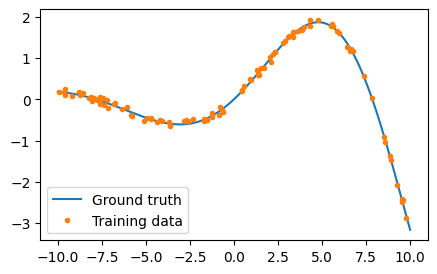

In [ ]:
# Ground truth
f = lambda x: np.sin(0.4*x)*(np.exp(x/7.0))

# Random sampling
np.random.seed(0)

ndata = 100
xdata = 20*np.random.rand(ndata)-10
ydata = f(xdata)

noise = 0.1*(2*np.random.rand(ndata) - 1)
ydata += noise

# Visualization
xplot = np.linspace(-10, 10, 1000) # auxiliary grid (only for plotting! Typically not available...)
yplot = f(xplot)
plt.figure(figsize = (5, 3))
plt.plot(xplot, yplot, label = 'Ground truth')
plt.plot(xdata, ydata, '.', label = 'Training data')
plt.legend()
plt.show()

In [ ]:
# Transfering from numpy arrays to torch tensors
xdata = dv.tensor(xdata).reshape(-1, 1)
ydata = dv.tensor(ydata).reshape(-1, 1)

In [ ]:
#from dlroms.roms import DFNN

# Neural network architecture
phi = Dense(1, 5, gelu) + Dense(5, 5, gelu) + Dense(5, 1, activation = None)

# Embedding the architecture onto a trainable object
model = DFNN(phi)

# Random initialization
model.He()

In [ ]:
def loss(true, pred):
    return (true-pred).pow(2).sum(axis = -1).mean()

def error(true, pred):
    return (true-pred).abs().sum(axis = -1).mean()

ntrain = int(ndata*0.7)
nvalid = int(ntrain*0.2)

model.train(xdata, ydata, ntrain = ntrain, nvalid = nvalid, epochs = 100, loss = loss, error = error)

		Train		Valid		Test
Epoch 100:	3.18e-02	6.07e-02	6.68e-02.

>> ETA: 0.10s.

Training complete. Elapsed time: 9.65 seconds.


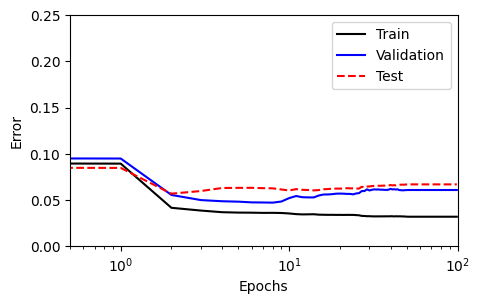

In [ ]:
# Diagnostic
plt.figure(figsize = (5, 3))
plt.semilogx(model.errors['Train'], '-k', label = 'Train')
plt.semilogx(model.errors['Validation'], 'b', label = 'Validation')
plt.semilogx(model.errors['Test'], '--r', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.axis([0.5, 100, 0, 0.25])
plt.legend()
plt.show()

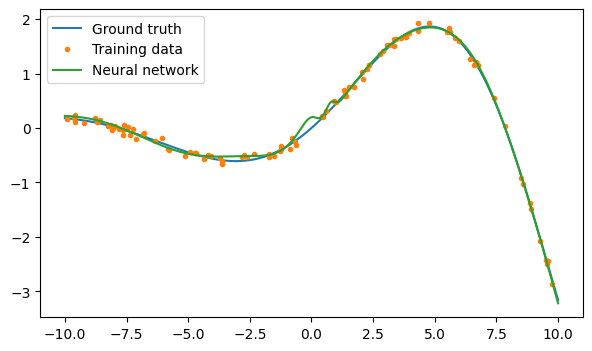

In [ ]:
# Freezing and evaluation
model.freeze()

plt.figure(figsize = (7, 4))
plt.plot(xplot, yplot, label = 'Ground truth')

xplot = xplot.reshape(-1, 1)
plt.plot(xdata, ydata, '.', label = 'Training data')
plt.plot(xplot, model(xplot), label = 'Neural network')
plt.legend()
plt.show()

<mark>**Exercise 1**</mark></br>
We want to learn the map

$$s:(x,y)\mapsto x - y^2$$

by relying on noisy samples $\{(x_i, y_i), z_i\}_{i=1}^{N}$, where $z_i\approx s(x_i, y_i)$. Implement and train a suitable neural network model using the data provided below. To this end, make sure to split the data between training and testing with a 50:50 ratio, devoting 10% of the training set to the validation procedure.

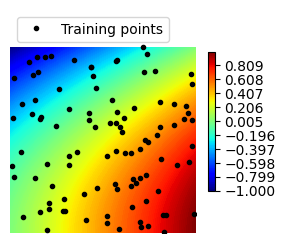

In [ ]:
from IPython.display import clear_output as clc
s = lambda x: x[0] - x[1]**2

N = 100
np.random.seed(0)
xydata = np.random.rand(N, 2)
sdata = s(xydata.T)

noise = 0.02*(2*np.random.rand(N) - 1)
sdata += noise

mesh = fe.unitsquaremesh(50, 50)
Vh = fe.space(mesh, 'CG', 1)
sh = fe.interpolate(s, Vh)
clc()

plt.figure(figsize = (3, 3))
fe.plot(sh, colorbar = True, shrink = 0.6)
plt.plot(xydata[:, 0], xydata[:, 1], '.k', label = 'Training points')
plt.axis([0, 1, 0, 1.2])
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
xydata = dv.tensor(xydata)
sdata = dv.tensor(sdata).reshape(-1, 1)

In [ ]:
phi2D = Dense(2, 50, gelu) + Dense(50, 2, gelu) + Dense(2, 1, activation = None)
model2D = DFNN(phi2D)
model2D.He()
model2D.train(xydata, sdata, ntrain = N//2, nvalid = int(0.1*ntrain), epochs = 100, loss = loss, error = error)

		Train		Valid		Test
Epoch 100:	9.49e-03	1.06e-02	1.21e-02.

>> ETA: 0.02s.

Training complete. Elapsed time: 1.66 seconds.


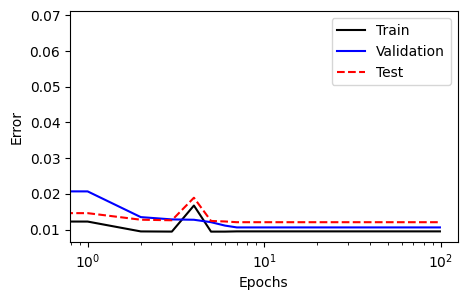

In [ ]:
plt.figure(figsize = (5, 3))
plt.semilogx(model2D.errors['Train'], '-k', label = 'Train')
plt.semilogx(model2D.errors['Validation'], 'b', label = 'Validation')
plt.semilogx(model2D.errors['Test'], '--r', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

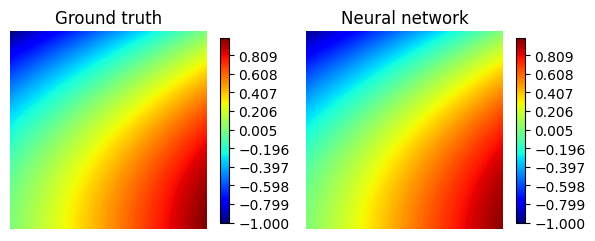

In [ ]:
model2D.freeze()

plt.figure(figsize = (7, 3))
plt.subplot(1, 2, 1)
fe.plot(sh, colorbar = True, vmin = -1, vmax = 1)
plt.title("Ground truth")

xplot = fe.dofs(Vh)
plt.subplot(1, 2, 2)
fe.plot(model2D(xplot).reshape(-1), Vh, colorbar = True, vmin = -1, vmax = 1)
plt.title("Neural network")

plt.show()

## Convolutional neural networks

Convolutional neural networks are particular architectures tailored for handling high-dimensional inputs, coming in form of *channelled-data* (images in 2D, time series in 1D, etc.). They were introduced to mitigate the number of trainable parameters, as dense layers typically resulted in very complex architectures.

In brief, convolutional layers use a "shared" bias value (instead of a whole vector) and rely on a convolutional kernels rather than weight matrices (the action is still linear, but it can be described by far less parameters).
</br></br>
*Note: differently from dense layers, convolutional layers can operate on inputs with different dimensions, as long as their shapes are consistent.*

In [ ]:
from dlroms.dnns import Conv2D

L = Conv2D(window = 2, channels = (1, 1))
print(L.w())
print()
print(L.b())

Parameter containing:
tensor([[[[-0.0834,  0.2697],
          [-0.1758,  0.1823]]]], requires_grad=True)

Parameter containing:
tensor([-0.1099], requires_grad=True)


In [ ]:
# NB: 2D convolutional layers expect inputs to be of the form Nsamples x Nchannels x Xdim x Ydim
from dlroms.dnns import Reshape

network = Reshape(1, 10, 10) + Conv2D(window = 2, channels = (1, 4)) + Conv2D(window = 2, channels = (4, 2)) + Reshape(-1)
network.dims()

'100 -> (1, 10, 10) -> (4, 9, 9) -> (2, 8, 8) -> 128'

<mark>**Exercise 2**</mark></br>
The following dataset consists of pairs $\{\mathbf{D}_{i}, \mathbf{c}_{i}\}_{i=1}^{N}$ where

- $\mathbf{D}_{i}$ is a $51\times51$ matrix representing an image of a circle within the unit square;

- $\mathbf{c}_{i}\in\mathbb{R}^{2}$ is the center of the circle in $\mathbf{D}_{i}$.

By combining convolutional and dense layers, construct a suitable neural network model approximating the map $\mathbf{D}\mapsto\mathbf{c}$. Split the dataset between training and testing with a 2:1 ratio. Concerning the training procedure, keep 50 samples out of the optimization loop and, instead, use them for validation.

In [ ]:
import gdown
gdown.download(id = "1sHrkt2NjugFlGsgzsd-skbpEvRx8pAUy", output = "circles.npz")
circles_data = np.load("circles.npz")

D, c = circles_data['D'], circles_data['c']

Downloading...
From: https://drive.google.com/uc?id=1sHrkt2NjugFlGsgzsd-skbpEvRx8pAUy
To: /content/circles.npz
100%|██████████| 6.25M/6.25M [00:00<00:00, 221MB/s]


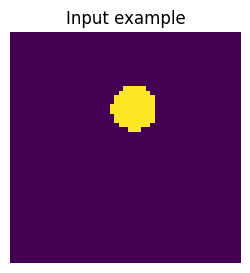

Center: [0.5390508  0.67215149].


In [ ]:
plt.figure(figsize = (3, 3))
plt.title("Input example")
plt.imshow(D[0], origin = 'lower')
plt.axis("off")
plt.show()
print("Center: %s." % str(c[0]))

In [ ]:
D, c = dv.tensor(D, c)

In [ ]:
from dlroms.dnns import Conv2D, Reshape

psi = (Reshape(1, 51, 51) + Conv2D(window = 5, channels = (1, 1), stride = 2, activation = gelu) +
                            Conv2D(window = 2, channels = (1, 1), stride = 3, activation = gelu) +
                            Conv2D(window = 4, channels = (1, 8), stride = 3, activation = gelu) +
                            Reshape(-1) + Dense(32, 2, gelu))
psi.dims()

'2601 -> (1, 51, 51) -> (1, 24, 24) -> (1, 8, 8) -> (8, 2, 2) -> 32 -> 2'

In [ ]:
modelCNN = DFNN(psi)
modelCNN.He()
modelCNN.train(D, c, ntrain = 200, nvalid = 50, epochs = 50, loss = loss, error = error)

		Train		Valid		Test
Epoch 50:	2.37e-02	5.50e-02	5.79e-02.

>> ETA: 0.54s.

Training complete. Elapsed time: 26.90 seconds.


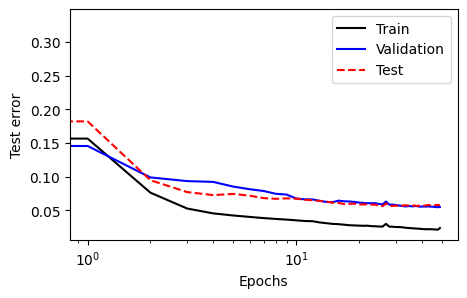

In [ ]:
modelCNN.freeze()
plt.figure(figsize = (5, 3))
plt.semilogx(modelCNN.errors['Train'], '-k', label = 'Train')
plt.semilogx(modelCNN.errors['Validation'], '-b', label = 'Validation')
plt.semilogx(modelCNN.errors['Test'], '--r', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Test error')
plt.legend()
plt.show()

In [ ]:
D = D.cpu().numpy()

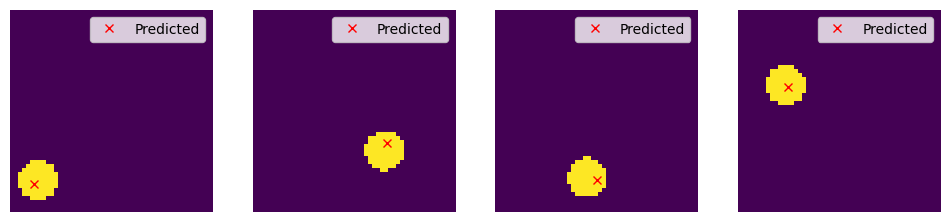

In [ ]:
predicted = modelCNN(D)
plt.figure(figsize = (12, 3))
for j in range(4):
    image = D[-j-7]
    center = 51*predicted[-j-7]
    plt.subplot(1,4,j+1)
    plt.imshow(image, origin = 'lower')
    plt.plot(*center, 'x', color = 'red', label = 'Predicted')
    plt.legend()
    plt.axis("off")

<mark>**Exercise 3**</mark></br>
The following dataset is similar to the previous one but features images of squares (rather than circles). Test the model built in Exercise 2 on this new dataset: does it still work?

In [ ]:
gdown.download(id = "12uRzMm0YW6Xe7K5azeODSdvIXGLiAQmi", output = "squares.npz")
squares_data = np.load("squares.npz")

S, c = squares_data['S'], squares_data['c']

Downloading...
From: https://drive.google.com/uc?id=12uRzMm0YW6Xe7K5azeODSdvIXGLiAQmi
To: /content/squares.npz
100%|██████████| 6.25M/6.25M [00:00<00:00, 176MB/s]


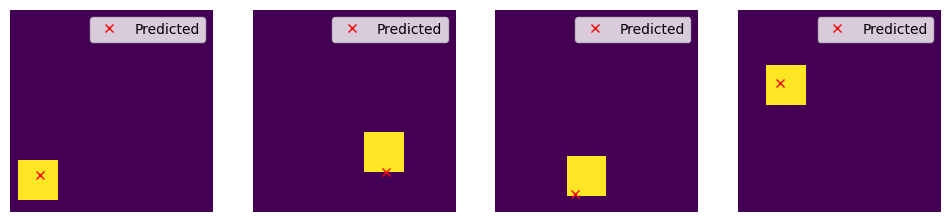

In [ ]:
predicted = modelCNN(S)
plt.figure(figsize = (12, 3))
for j in range(4):
    image = S[-j-7]
    center = 51*predicted[-j-7]
    plt.subplot(1,4,j+1)
    plt.imshow(image, origin = 'lower')
    plt.plot(*center, 'x', color = 'red', label = 'Predicted')
    plt.legend()
    plt.axis("off")

In [ ]:
error(dv.tensor(c), modelCNN(dv.tensor(S))).item()

0.07828333228826523